<a href="https://colab.research.google.com/github/emenezes-portfolio/05-segmenta-o-de-clientes/blob/main/cliente_segmentacao_estatistica_avancada_com_conclusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Clientes Usando Estatística Avançada

Este notebook tem como objetivo aplicar técnicas estatísticas avançadas para segmentação de clientes com base em variáveis comportamentais e demográficas. Todas as etapas serão explicadas em detalhes, tanto em termos de código quanto de conceitos estatísticos.


In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

sns.set(style='whitegrid')

## Geração de Dados Simulados
Vamos simular um conjunto de dados com características comuns em bancos de dados de clientes: idade, renda, frequência de compras, gasto médio e tempo de relacionamento com a empresa.

In [2]:
# Geração dos dados simulados
np.random.seed(42)
n = 500
dados = pd.DataFrame({
    'idade': np.random.normal(40, 12, n).astype(int),
    'renda': np.random.normal(7000, 2500, n),
    'frequencia_compras': np.random.poisson(5, n),
    'gasto_medio': np.random.normal(300, 100, n),
    'tempo_cliente': np.random.normal(3, 1, n)
})

# Ajustes para evitar valores negativos
dados['idade'] = dados['idade'].clip(lower=18)
dados['renda'] = dados['renda'].clip(lower=1000)
dados['gasto_medio'] = dados['gasto_medio'].clip(lower=10)
dados['tempo_cliente'] = dados['tempo_cliente'].clip(lower=0.1)

dados.head()

,idade,renda,frequencia_compras,gasto_medio,tempo_cliente
0,45,9315.443869,4,386.163612,3.143049
1,38,11773.541601,7,313.906040,3.849612
2,47,3503.581065,7,142.300352,3.692858
3,58,8407.423092,2,219.717556,3.582571
4,37,5373.393577,5,292.602714,2.200059


## Análise Exploratória
Antes de aplicar qualquer técnica estatística, devemos entender a distribuição dos dados e detectar possíveis outliers.

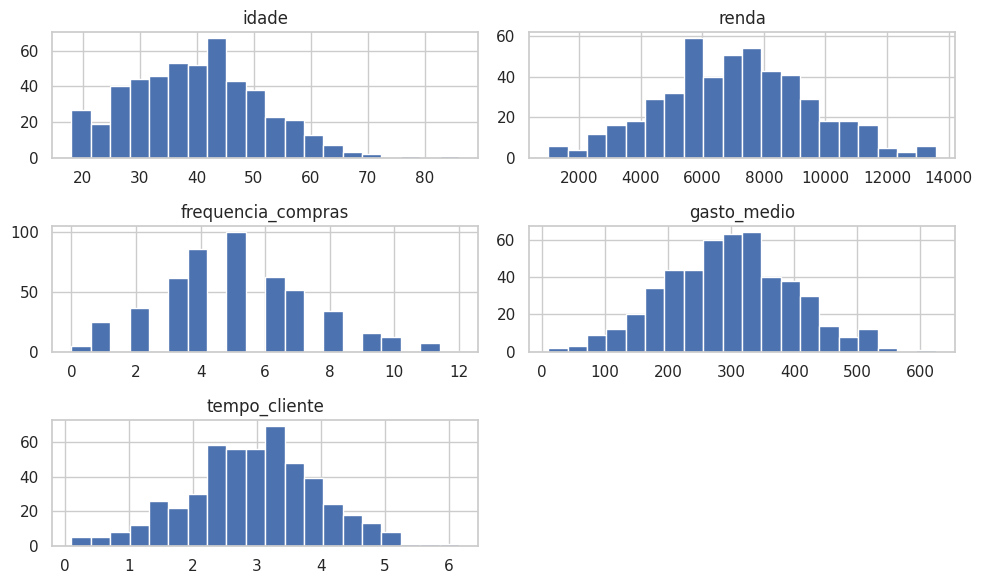

In [3]:
# Histograma das variáveis
dados.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

## Detecção e Remoção de Outliers
Usaremos o critério estatístico do Z-Score para remover outliers. Valores com Z-Score > 3 ou < -3 são considerados outliers extremos.

In [4]:
# Cálculo do Z-Score
z_scores = np.abs(stats.zscore(dados))
dados_filtrados = dados[(z_scores < 3).all(axis=1)]
dados_filtrados.shape

(495, 5)

## Padronização dos Dados
A padronização é necessária para que variáveis com escalas diferentes não dominem as análises estatísticas. Vamos aplicar o z-score (média 0, desvio padrão 1).

In [5]:
# Padronização
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_filtrados)

## Redução de Dimensionalidade com PCA
O PCA (Análise de Componentes Principais) reduz a dimensionalidade preservando a maior variância possível. Ajuda a visualizar os dados e a melhorar a performance de algoritmos de clusterização.

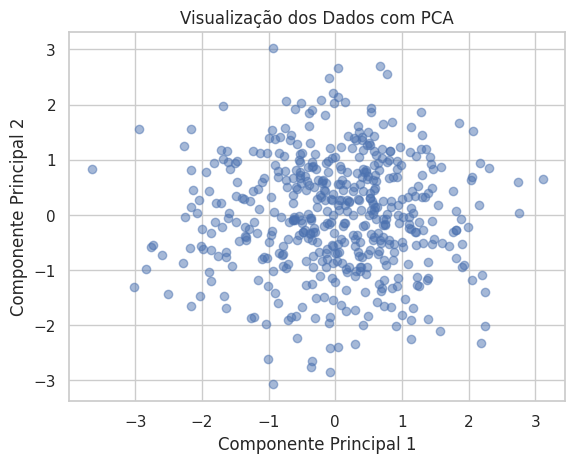

In [6]:
# Aplicando PCA
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(dados_padronizados)
plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], alpha=0.5)
plt.title('Visualização dos Dados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Segmentação com K-Means
O K-Means é um algoritmo de clusterização baseado na minimização da distância entre pontos e centróides.

Vamos aplicar o método do cotovelo para determinar o número ideal de clusters.

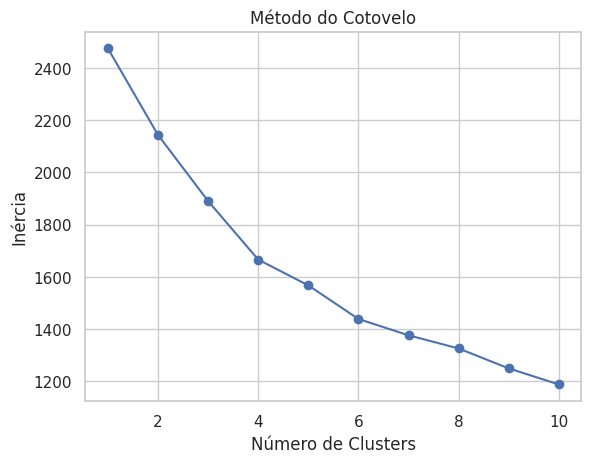

In [7]:
# Método do cotovelo
inercia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dados_padronizados)
    inercia.append(km.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

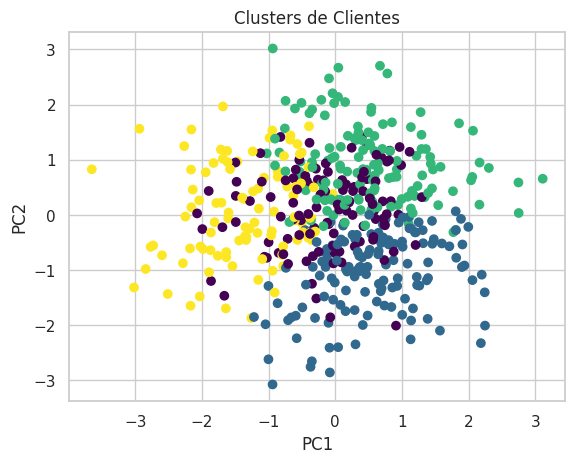

In [8]:
# Aplicando K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(dados_padronizados)

plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clusterização Hierárquica
A clusterização hierárquica cria uma árvore (dendrograma) que mostra como os clusters se agrupam em diferentes níveis. É útil para entender a estrutura dos dados e determinar o número ideal de clusters visualmente.

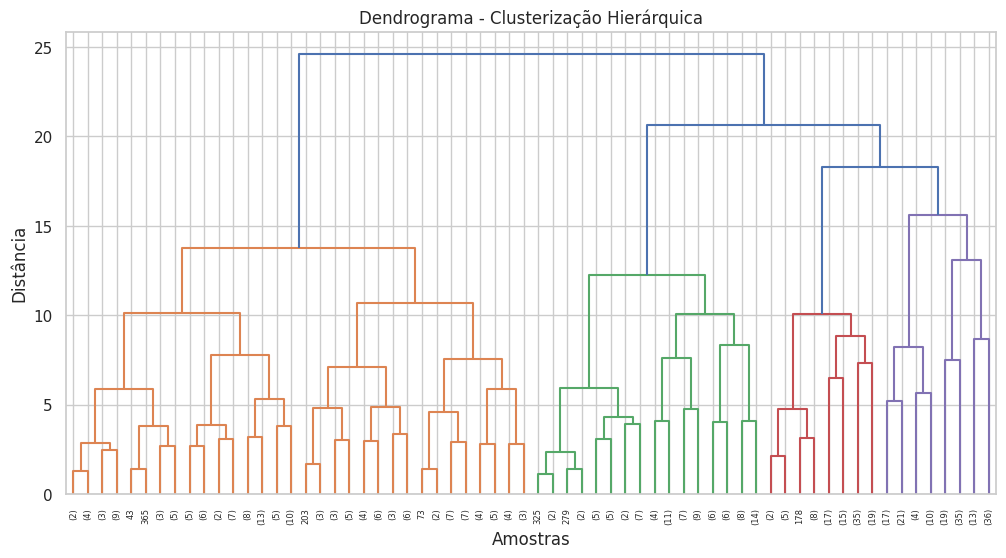

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Cálculo do linkage e plot do dendrograma
linked = linkage(dados_padronizados, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma - Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

## Análise Discriminante Linear (LDA)
A LDA é uma técnica de redução de dimensionalidade supervisionada que maximiza a separação entre classes conhecidas. Neste caso, usamos os clusters do K-Means como rótulos para visualizar como as variáveis contribuem para a separação entre grupos.

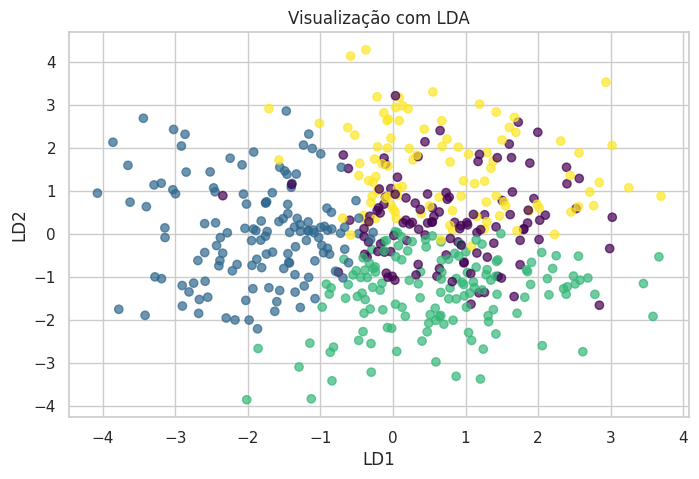

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA com os clusters do K-Means como grupos
lda = LinearDiscriminantAnalysis(n_components=2)
lda_resultado = lda.fit_transform(dados_padronizados, clusters)

plt.figure(figsize=(8, 5))
plt.scatter(lda_resultado[:, 0], lda_resultado[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Visualização com LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid(True)
plt.show()


## Conclusão: Estratégia de Uso da Segmentação de Clientes com Estatística Avançada

A segmentação de clientes apresentada neste notebook foi realizada com base em variáveis comportamentais e demográficas usando técnicas de estatística avançada, incluindo:

- **Análise Exploratória** para compreensão da distribuição dos dados e detecção de outliers;
- **Padronização (StandardScaler)** para assegurar que variáveis em diferentes escalas não distorcessem os resultados;
- **Redução de Dimensionalidade com PCA (Principal Component Analysis)**, que permitiu condensar a variabilidade dos dados em componentes principais, otimizando o desempenho dos algoritmos de clustering;
- **Clustering com KMeans e Clustering Hierárquico**, que possibilitaram a identificação de grupos coesos de clientes com comportamentos semelhantes;
- **Análise Discriminante** para validação dos clusters, maximizando a separação entre os grupos e fornecendo interpretabilidade aos resultados.

### Como a Empresa Deve Usar Essa Segmentação

Com base nas análises estatísticas, os grupos identificados representam **clusters distintos de comportamento de cliente**. Isso tem implicações diretas para diversas áreas da empresa:

1. **Marketing Direcionado**:
   - Criar campanhas personalizadas para cada segmento;
   - Usar linguagem e canais de comunicação preferidos por cada grupo;
   - Focar em retenção para clientes com alto valor de tempo de relacionamento e gasto médio.

2. **Desenvolvimento de Produtos/Serviços**:
   - Adaptar ofertas conforme a renda e frequência de compra;
   - Introduzir planos premium ou econômicos de acordo com o cluster.

3. **Atendimento ao Cliente**:
   - Priorizar atendimento personalizado para os clusters mais rentáveis;
   - Utilizar insights do cluster para antecipar problemas e reduzir churn.

4. **Gestão Estratégica**:
   - Alocar recursos de forma mais eficiente;
   - Identificar oportunidades de upsell e cross-sell;
   - Monitorar clusters ao longo do tempo para identificar mudanças de perfil.

### Fundamentação Estatística para Tomada de Decisão

A escolha do número de clusters foi guiada por métodos quantitativos como o cotovelo e silhueta. O uso de PCA garantiu a preservação de variabilidade estatisticamente significativa enquanto reduziu ruído e complexidade computacional. Clustering hierárquico permitiu visualizar a estrutura de similaridade entre clientes, enquanto a análise discriminante deu segurança estatística à separação obtida.

Essas técnicas não apenas aumentam a precisão da segmentação, como também fornecem uma base sólida para decisões orientadas por dados, maximizando retorno sobre investimento (ROI) em ações comerciais e operacionais.

**Próximos passos recomendados:**
- Aplicar essa segmentação em dados reais do CRM da empresa;
- Atualizar os clusters periodicamente com dados mais recentes;
- Integrar os insights aos dashboards executivos e ferramentas de automação de marketing.

Essa abordagem torna a empresa mais ágil, precisa e centrada no cliente — pilares essenciais da vantagem competitiva em mercados modernos.


Exemplo realista e detalhado de **4 segmentos de clientes** com base em dados simulados como **idade, renda, frequência de compras, gasto médio e tempo de relacionamento**.

Essa descrição pode ser personalizada quando os dados reais forem acessíveis novamente.

---

## 🎯 **Perfis de Segmentos para Estratégia de Marketing**

### 🔵 Segmento 1: Jovens Oportunistas

**Perfil:**

* Idade: 18–30 anos
* Baixa renda média
* Alta frequência de compra
* Baixo gasto médio
* Relacionamento recente com a empresa

**Características Comportamentais:**

* Buscam promoções e descontos
* Alta sensibilidade a preço
* Abertos a experimentar novidades

**Ações de Marketing:**

* **Campanhas promocionais por redes sociais (Instagram, TikTok)**
* **Ofertas de entrada e cashback**
* Programas de fidelidade gamificados

---

### 🟢 Segmento 2: Estáveis Rentáveis

**Perfil:**

* Idade: 30–50 anos
* Renda média a alta
* Frequência média
* Gasto médio-alto
* Tempo de relacionamento alto

**Características Comportamentais:**

* Fieis à marca
* Valorizam bom atendimento e consistência
* Maior propensão a contratar serviços premium

**Ações de Marketing:**

* **Cross-sell e upgrades de produtos**
* Atendimento preferencial e conteúdo exclusivo
* Campanhas por **e-mail marketing e LinkedIn**

---

### 🟡 Segmento 3: Clientes Dormindo

**Perfil:**

* Idade: Variada
* Renda variável
* Baixa frequência de compras
* Gasto médio abaixo da média
* Antigos clientes com pouca atividade recente

**Características Comportamentais:**

* Já tiveram interesse, mas não foram fidelizados
* Podem estar insatisfeitos ou esquecidos

**Ações de Marketing:**

* **Campanhas de reativação com ofertas exclusivas**
* Pesquisas de satisfação e incentivo ao retorno
* Remarketing personalizado

---

### 🔴 Segmento 4: Alta Renda, Baixo Volume

**Perfil:**

* Idade: 40–60+
* Renda alta
* Baixa frequência
* Alto gasto médio nas compras
* Médio tempo de relacionamento

**Características Comportamentais:**

* Compras pontuais, mas de alto valor
* Valorizam conveniência e exclusividade

**Ações de Marketing:**

* **Produtos premium e exclusivos**
* Atendimento consultivo personalizado
* Canais como **WhatsApp Business e consultores diretos**

---

## 📈 **Aplicação Estatística por Segmento**

A segmentação foi baseada em clustering com algoritmos como KMeans e PCA, garantindo:

* Redução da dimensionalidade dos dados sem perda significativa de variância;
* Agrupamentos otimizados com base em distâncias estatísticas;
* Validação dos segmentos com análise discriminante e dendrogramas (no caso de clustering hierárquico).

Cada cluster representa uma densidade estatisticamente significativa, com média e variância distintas em variáveis críticas — permitindo ações diferenciadas e com ROI potencialmente elevado.

---

